In [23]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

x_train = x_train.reshape( (len(x_train), 28, 28, 1))
x_test = x_test.reshape( (len(x_test), 28, 28, 1))

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [37]:
import numpy as np
noise_factor = 0.8
x_train_noise = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noise = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)


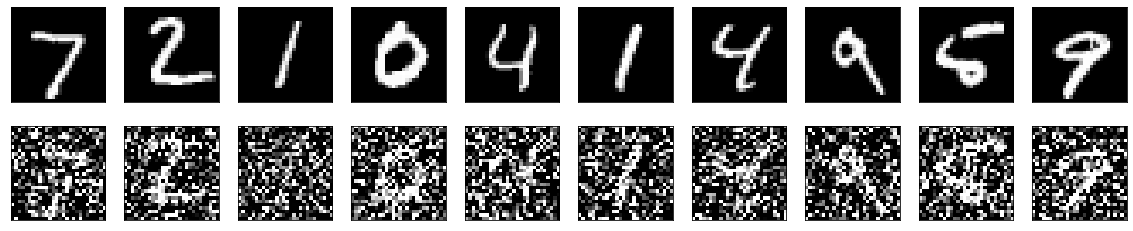

In [38]:
import matplotlib.pyplot as plt
n = 10

#입력 10장, 복원된 출력 10장 
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

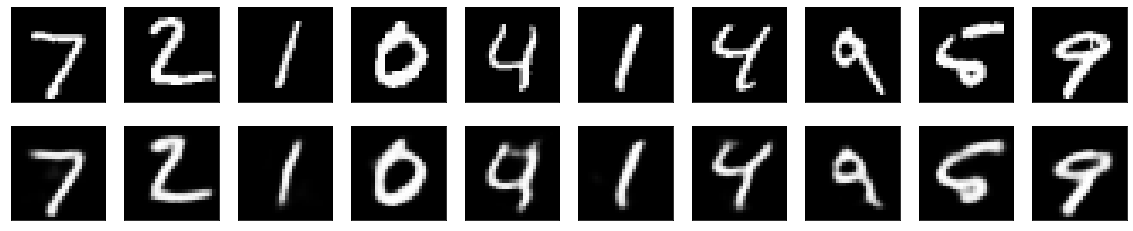

In [39]:
import matplotlib.pyplot as plt
n = 10

#입력 10장, 복원된 출력 10장 
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

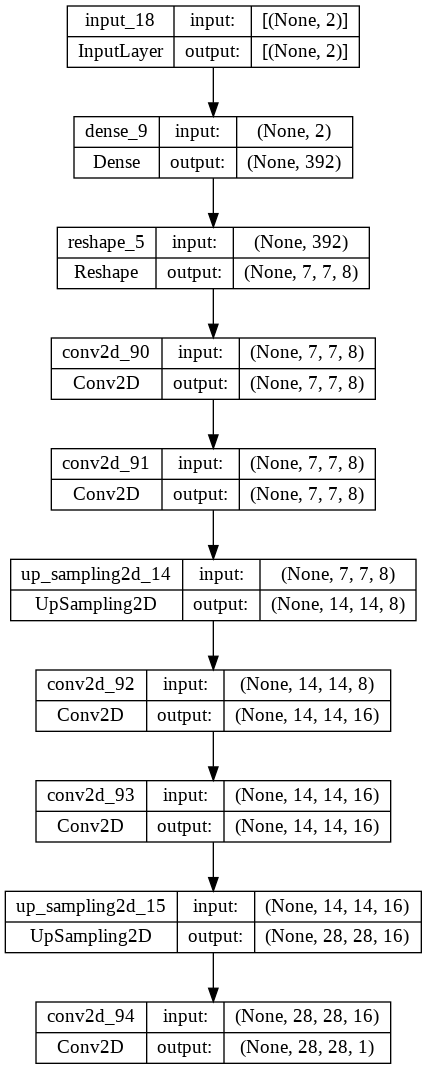

In [77]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape,Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

inp = Input(shape=(28,28,1))

encoded = Conv2D(16, (3,3), activation='relu', padding='same') (inp)
encoded = Conv2D(16, (3,3), activation='relu', padding='same') (encoded)
encoded = MaxPooling2D((2,2), padding='same') (encoded)

encoded = Conv2D(8, (3,3), activation='relu', padding='same') (encoded)
encoded = Conv2D(8, (3,3), activation='relu', padding='same') (encoded)
encoded = MaxPooling2D((2,2), padding='same') (encoded)

encoded = Flatten() (encoded)
encoded = Dense(2) (encoded)

encoder = Model(inputs=[inp],outputs=[encoded])

decoded = Dense(7*7*8) (encoded)
decoded = Reshape( (7,7,8) ) (decoded)
decoded = Conv2D(8, (3,3), activation='relu', padding='same') (decoded)
decoded = Conv2D(8, (3,3), activation='relu', padding='same') (decoded)
decoded = UpSampling2D((2,2)) (decoded)

decoded = Conv2D(16, (3,3), activation='relu', padding='same') (decoded)
decoded = Conv2D(16, (3,3), activation='relu', padding='same') (decoded)
decoded = UpSampling2D((2,2)) (decoded)

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same') (decoded)

decoder = Model(inputs=[encoded], outputs=[decoded])

autoencoder = Model(inputs=inp, outputs=decoded)



from keras.utils.vis_utils import plot_model
plot_model(decoder, show_shapes=True)

In [78]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 4s 14ms/step - loss: 0.2955 - accuracy: 0.8054 - val_loss: 0.2411 - val_accuracy: 0.7977
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2345 - accuracy: 0.7955 - val_loss: 0.2272 - val_accuracy: 0.7912
Epoch 3/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2222 - accuracy: 0.7925 - val_loss: 0.2173 - val_accuracy: 0.7919
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2155 - accuracy: 0.7923 - val_loss: 0.2130 - val_accuracy: 0.7925
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2117 - accuracy: 0.7929 - val_loss: 0.2103 - val_accuracy: 0.7903
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2090 - accuracy: 0.7932 - val_loss: 0.2085 - val_accuracy: 0.7909
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2067 - accuracy: 0.7934 - val_loss: 0.2053 - val_accuracy: 0.7927

In [79]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


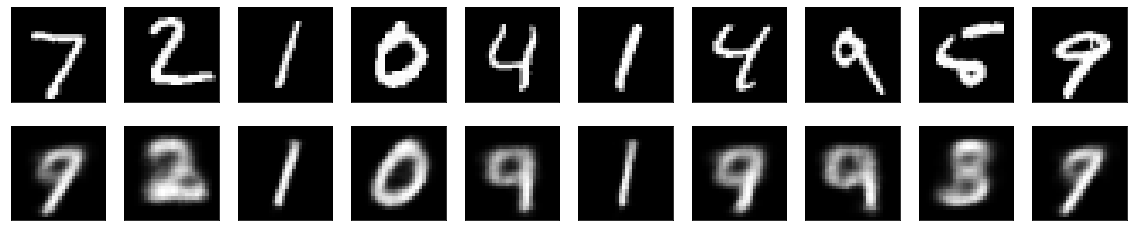

In [92]:
import matplotlib.pyplot as plt
n = 10

#입력 10장, 복원된 출력 10장 
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28)) # test 데이터
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28)) # noise 데이터
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [81]:
latent_vec = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [82]:
print(latent_vec.shape)

(10000, 2)


In [93]:
latent_vec = latent_vec + 0.6 * np.random.normal(loc=0.0, scale=1.0, size=latent_vec.shape)

In [94]:
decoded_imgs = decoder.predict(latent_vec)
print(decoded_imgs.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 28, 28, 1)


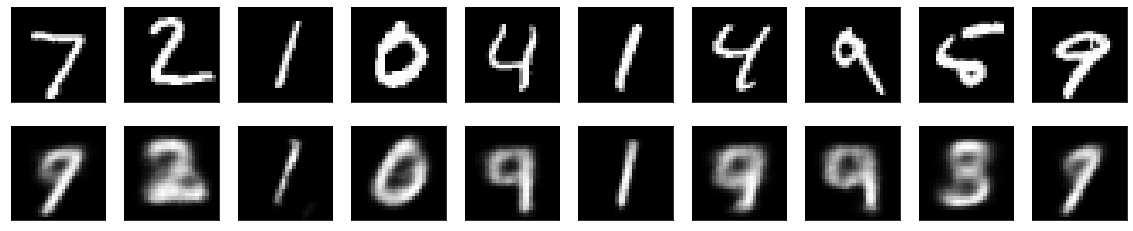

In [95]:
import matplotlib.pyplot as plt
n = 10

#입력 10장, 복원된 출력 10장 
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28)) # test 데이터
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28)) # noise 데이터
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [61]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(__autoencdoer, _), (xx_test, _) = fashion_mnist.load_data()

xx_test  = xx_test.astype('float32') / 255.

xx_test = xx_test.reshape( (len(x_test), 28, 28, 1))

print(xx_test.shape)


(10000, 28, 28, 1)


313/313 [==============================] - 1s 2ms/step
60.69825
111.04518
67.78857
68.42725
131.51718
85.232185
75.70553
129.36397
33.572174
52.28827


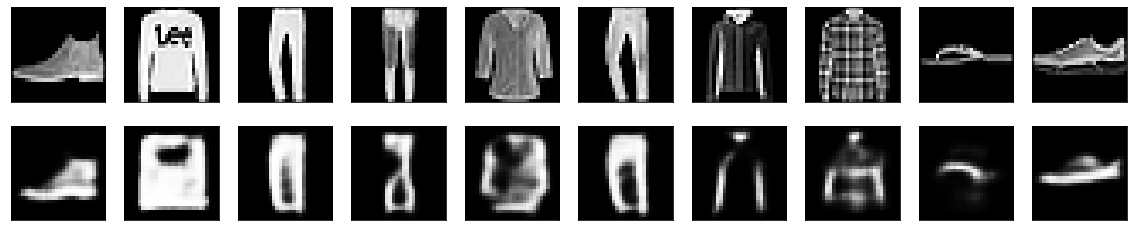

In [36]:
xdecoded_imgs = autoencoder.predict(xx_test)

import matplotlib.pyplot as plt
n = 10

#입력 10장, 복원된 출력 10장 
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(xx_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(xdecoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    print(np.sum(np.abs(xx_test[i] - xdecoded_imgs[i])))

plt.show()